In [1]:
""" 하우징 데이터 정리 """
import pandas as pd

df = pd.read_csv('../dataset/housing.data', sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
             'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df[['RM']].values
y = df['MEDV'].values

In [2]:
""" RANSAC 알고리즘 적용해보기 """
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(LinearRegression(),
                        max_trials = 100,
                        min_samples = 50,
                        loss = 'absolute_loss', # 절댓값
                        residual_threshold = 5.0, # 직선과 수직거리 5 이내만 정상 샘플에 포함
                        random_state = 0)
# 사이컷런의 정상치 임계 값의 기본값은 MAD (중앙값 절대 편차) 이다.
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

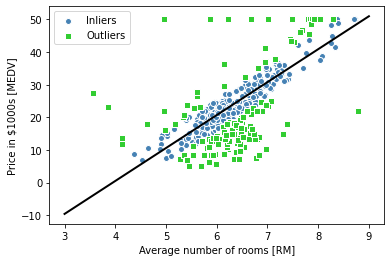

In [6]:
""" 정상치와 이상치 얻기 """
import matplotlib.pyplot as plt
import numpy as np

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
           c = 'steelblue', edgecolor = 'white',
           marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
           c = 'limegreen', edgecolor = 'white',
           marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac,
        color = 'black', linewidth = 2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
""" 기울기 절편 비교 """

print('기울기 : %.3f' % ransac.estimator_.coef_[0])
print('절편 : %.3f' % ransac.estimator_.intercept_)

기울기 : 10.099
절편 : -39.915
